In [2]:
import pandas as pd
import numpy as np
from chromwindow import window
import matplotlib.pyplot as plt
import random
from random import sample
import seaborn as sns

In [3]:
#Loading the data
data = pd.read_csv("ArchaicSegments.txt", sep='\t')
data.head(20)

,name,chrom,start,end,length,snps,pop,country,region,MeanProb,Shared_with_Altai,Shared_with_Denisova,Shared_with_Vindija,outgroup,method
0,ERS699811,1,1562000,1603000,41000,5,Toto,India,EastAsia,0.557200,0,0,0,SubAfricans,HMM
1,ERS699811,1,2791000,2815000,24000,12,Toto,India,EastAsia,0.830425,7,0,5,SubAfricans,HMM
2,ERS699811,1,3058000,3113000,55000,36,Toto,India,EastAsia,0.973321,10,6,12,SubAfricans,HMM
3,ERS699811,1,3341000,3384000,43000,21,Toto,India,EastAsia,0.910253,9,1,8,SubAfricans,HMM
4,ERS699811,1,3433000,3453000,20000,13,Toto,India,EastAsia,0.943712,8,0,7,SubAfricans,HMM
5,ERS699811,1,3579000,3601000,22000,10,Toto,India,EastAsia,0.772108,2,0,3,SubAfricans,HMM
6,ERS699811,1,3684000,3784000,100000,35,Toto,India,EastAsia,0.974502,17,5,15,SubAfricans,HMM
7,ERS699811,1,3984000,4091000,107000,19,Toto,India,EastAsia,0.873133,5,4,5,SubAfricans,HMM
8,ERS699811,1,5024000,5123000,99000,23,Toto,India,EastAsia,0.824491,8,6,11,SubAfricans,HMM
9,ERS699811,1,5193000,5248000,55000,15,Toto,India,EastAsia,0.939105,9,0,11,SubAfricans,HMM


In [4]:
#droping segments with negative lenght
data = data[data['length'] > 0]

In [5]:
#sort rows by start and end coordinates to avoid negative values
data = data.sort_values(by=['start', 'end'])  
data

,name,chrom,start,end,length,snps,pop,country,region,MeanProb,Shared_with_Altai,Shared_with_Denisova,Shared_with_Vindija,outgroup,method
579,ERS699811,7,3000,75000,72000,53,Toto,India,EastAsia,0.808436,25,18,24,SubAfricans,HMM
174980,S_Spanish-2,7,10000,156000,146000,29,Spanish,Spain,WestEurasia,0.859745,5,1,5,SubAfricans,HMM
298069,S_Pathan-2,7,13000,132000,119000,20,Pathan,Pakistan,SouthAsia,0.882661,4,1,5,SubAfricans,HMM
211718,S_Ulchi-2,20,17000,211000,194000,17,Ulchi,Russia,CentralAsiaSiberia,0.879004,0,1,0,SubAfricans,HMM
20470,ERS699826,20,19000,175000,156000,9,Monpa,Bhutan,EastAsia,0.797653,0,1,0,SubAfricans,HMM
72479,ERS724853,7,27000,119000,92000,21,Chepang,Nepal,EastAsia,0.855076,3,0,3,SubAfricans,HMM
276683,S_Burusho-2,7,28000,133000,105000,25,Burusho,Pakistan,SouthAsia,0.880568,5,1,5,SubAfricans,HMM
166907,S_Russian-1,7,29000,117000,88000,16,Russian,Russia,WestEurasia,0.849804,2,0,2,SubAfricans,HMM
174036,S_Spanish-1,7,29000,135000,106000,22,Spanish,Spain,WestEurasia,0.869371,4,1,4,SubAfricans,HMM
145674,S_Greek-2,7,29000,163000,134000,29,Greek,Greece,WestEurasia,0.917167,6,2,9,SubAfricans,HMM


In [ ]:
#progress control
from tqdm import tqdm, tqdm_notebook
tqdm_notebook().pandas()

#applying calculations in windows of 1Mb
@window(size=1000000)
def multiple_stats(df):
    # return dictionary
    return dict(tot_length=(df.end-df.start).sum(), proportion =(df.end-df.start).sum()/1000000, interval_count=len(df))
    
window_stats = data.groupby(['chrom', 'name', 'pop', 'region']).progress_apply(multiple_stats).reset_index(drop=True, level=-1)

In [ ]:
#saving result in a h5 file in local driver
window_stats.to_hdf('window_stats.h5', 'df', format='table', mode='w')

In [7]:
#load h5 file
window_stats = pd.read_hdf('window_stats.h5')
window_stats

#spread the values in windows for each individual
window_stats_spread = pd.pivot_table(window_stats, values='proportion', index=['name', 'pop', 'region'], columns=['chrom', 'end'])
#getting rid of NA values
window_stats_spread = window_stats_spread.fillna(0.000)
#Adding total proportion of archaic content for each individual
window_stats_spread['mean_proportion'] = window_stats_spread.mean(axis=1)
window_stats_spread.head(20)

chrom                             1                                          \
end                         1000000 2000000 3000000 4000000 5000000 6000000   
name      pop     region                                                      
13733_8   Papuans Melanesia   0.000   0.000   0.000   0.127   0.233   0.000   
13748_1   Papuans Melanesia   0.016   0.443   0.098   0.039   0.178   0.000   
13748_2   Papuans Melanesia   0.000   0.141   0.000   0.292   0.151   0.000   
13748_3   Papuans Melanesia   0.000   0.370   0.035   0.206   0.142   0.000   
13748_4   Papuans Melanesia   0.000   0.230   0.006   0.366   0.158   0.000   
13748_5   Papuans Melanesia   0.000   0.139   0.004   0.069   0.121   0.000   
13748_6   Papuans Melanesia   0.000   0.058   0.043   0.125   0.106   0.029   
13748_7   Papuans Melanesia   0.037   0.091   0.057   0.144   0.080   0.000   
13748_8   Papuans Melanesia   0.000   0.394   0.000   0.169   0.133   0.000   
13784_1   Papuans Melanesia   0.000   0.210   0.003   0.025   0.092   0.000   
13784_2   Papuans Melanesia   0.039   0.327   0.000   0.130   0.178   0.000   
13784_3   Papuans Melanesia   0.000   0.138   0.003   0.039   0.018   0.000   
13784_4   Papuans Melanesia   0.061   0.225   0.014   0.168   0.213   0.000   
13784_5   Papuans Melanesia   0.136   0.511   0.000   0.239   0.128   0.000   
BUN01     Papuans Melanesia   0.000   0.866   0.000   0.048   0.377   0.000   
BUN02     Papuans Melanesia   0.000   0.784   0.000   0.064   0.102   0.000   
BUN03     Papuans Melanesia   0.000   0.335   0.000   0.026   0.163   0.000   
BUN04     Papuans Melanesia   0.000   0.352   0.034   0.177   0.101   0.000   
BUN05     Papuans Melanesia   0.019   0.369   0.000   0.113   0.174   0.000   
ERS699811 Toto    EastAsia    0.000   0.041   0.024   0.256   0.091   0.154   

chrom                                                         ...         X  \
end                         7000000 8000000 9000000 10000000  ... 147000000   
name      pop     region                                      ...             
13733_8   Papuans Melanesia   0.020   0.000   0.000    0.000  ...     0.000   
13748_1   Papuans Melanesia   0.011   0.000   0.000    0.000  ...     0.008   
13748_2   Papuans Melanesia   0.000   0.000   0.000    0.000  ...     0.000   
13748_3   Papuans Melanesia   0.036   0.000   0.000    0.000  ...     0.000   
13748_4   Papuans Melanesia   0.015   0.108   0.000    0.000  ...     0.000   
13748_5   Papuans Melanesia   0.000   0.000   0.000    0.000  ...     0.000   
13748_6   Papuans Melanesia   0.000   0.000   0.000    0.000  ...     0.002   
13748_7   Papuans Melanesia   0.011   0.000   0.000    0.000  ...     0.000   
13748_8   Papuans Melanesia   0.000   0.000   0.000    0.000  ...     0.000   
13784_1   Papuans Melanesia   0.000   0.000   0.000    0.000  ...     0.042   
13784_2   Papuans Melanesia   0.000   0.000   0.000    0.045  ...     0.000   
13784_3   Papuans Melanesia   0.038   0.000   0.000    0.000  ...     0.000   
13784_4   Papuans Melanesia   0.079   0.060   0.000    0.000  ...     0.011   
13784_5   Papuans Melanesia   0.028   0.000   0.000    0.000  ...     0.000   
BUN01     Papuans Melanesia   0.013   0.053   0.000    0.007  ...     0.000   
BUN02     Papuans Melanesia   0.000   0.000   0.000    0.000  ...     0.000   
BUN03     Papuans Melanesia   0.000   0.000   0.000    0.000  ...     0.015   
BUN04     Papuans Melanesia   0.000   0.000   0.000    0.000  ...     0.000   
BUN05     Papuans Melanesia   0.000   0.070   0.000    0.000  ...     0.125   
ERS699811 Toto    EastAsia    0.031   0.014   0.006    0.107  ...     0.000   

chrom                                                                          \
end                         148000000 149000000 150000000 151000000 152000000   
name      pop     region                                                        
13733_8   Papuans Melanesia     0.000       0.0     0.000     0.000     0.035   
13748_1   Papuans Melanesia     0.028   

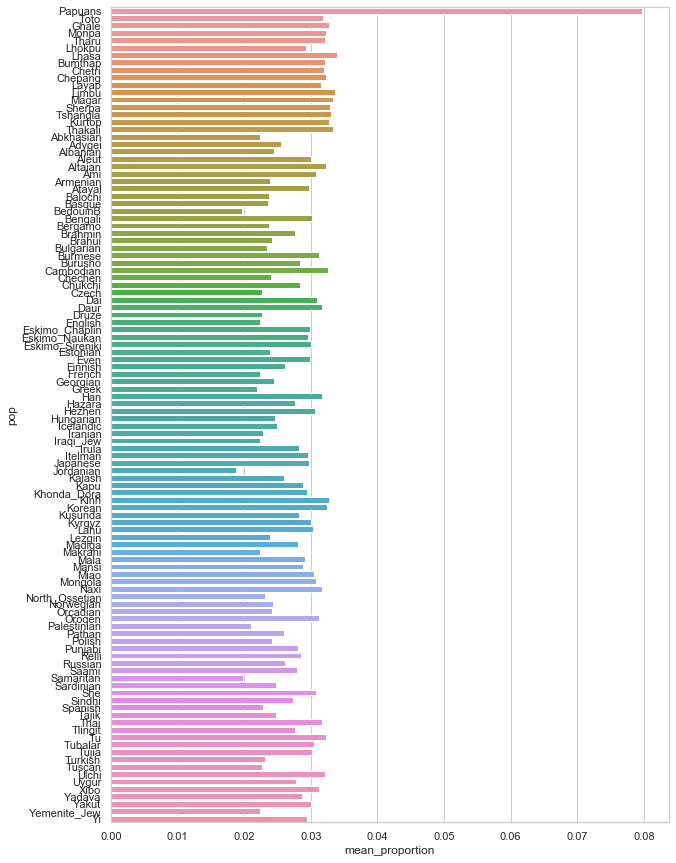

In [10]:
#convert series to df
prop_df = window_stats_spread['mean_proportion'].to_frame().reset_index()

#sns.set(style="darkgrid")
sns.set(style="whitegrid")

fig_dims = (10, 15)

fig, ax = plt.subplots(figsize=fig_dims)

sns.barplot(x = "mean_proportion", y = "pop", ax=ax, data=prop_df, ci=None)


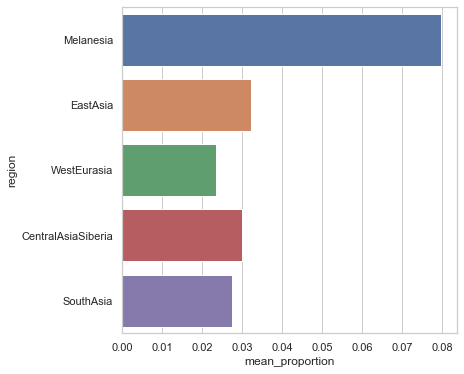

In [12]:
#by region
fig_dims = (6, 6)

fig, ax = plt.subplots(figsize=fig_dims)

sns.barplot(x = "mean_proportion", y = "region", ax=ax, data=prop_df, ci=None)

In [37]:
#saving all individuals, regions and populations in 3 diffrent arrays to later concatenat with the pca df
elements = window_stats_spread.index.values
individual = [x[0] for x in elements]
population = [x[1] for x in elements]
region = [x[2] for x in elements]

#getting the different popuation and region
regions = window_stats_spread.index.levels[2]
populations = window_stats_spread.index.levels[1] 

In [18]:
from sklearn.decomposition import PCA

# executing pca 
def pca(matrix, labels=None, n_components=2):
    sklearn_pca = PCA(n_components=n_components)
    sklearn_pca.fit(matrix)
    transform = sklearn_pca.transform(matrix)
    df = pd.DataFrame()
    for i in range(n_components):
        df[f'PC{i+1}'] = transform[:, i]
    if labels is not None:
        df['labels'] = labels
    return df

pca = pca(window_stats_spread)

#concatenate population, region and individual to pca df
pca['region'] = region
pca['pop'] = population
pca['individual'] = individual
pca.head(5)

,PC1,PC2,region,pop,individual
0,3.453411,-1.229709,Melanesia,Papuans,13733_8
1,3.650152,-1.074304,Melanesia,Papuans,13748_1
2,3.487398,-0.851066,Melanesia,Papuans,13748_2
3,3.225296,-1.356211,Melanesia,Papuans,13748_3
4,2.466053,-0.507597,Melanesia,Papuans,13748_4


AttributeError: 'AxesSubplot' object has no attribute 'savefig'

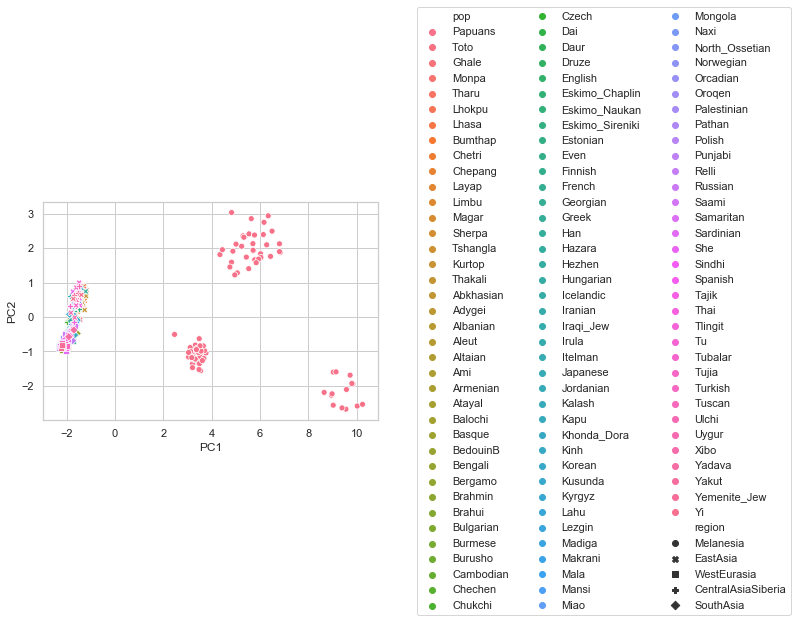

In [33]:
#plotting pca
g = sns.scatterplot(x = 'PC1', y = 'PC2', hue = "pop", style="region", data = pca)
g.legend(loc='center left', bbox_to_anchor=(1.1,0.5), ncol=3)
#g.savefig("figure.png")

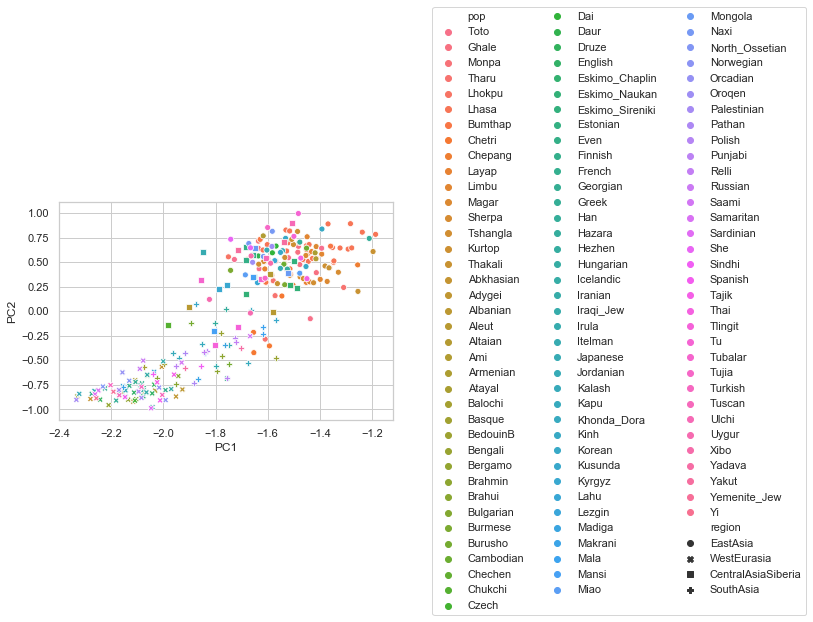

In [20]:
#Extracting and plotting individuals left cluster 
left_cluster = pca.loc[pca['PC1'] < 0]

g = sns.scatterplot(x = 'PC1', y = 'PC2', hue = "pop", style="region", data = left_cluster)
g.legend(loc='center left', bbox_to_anchor=(1.1,0.5), ncol=3)

# Sampling 5 individuals from each region to compute jaccard test of archaic origin for each pair of individuals

In [24]:
# individuals from WestEurasia
WE = pca.loc[pca['region'] == 'WestEurasia']


#random sample of five individuals 
indiv_WE = []
for i in WE.individual:
    indiv_WE.append(i)

random.sample(indiv_WE, 5)

['S_Turkish-2',
 'S_Bergamo-2',
 'S_Jordanian-3',
 'S_Yemenite_Jew-2',
 'S_French-2']

In [23]:
# individuals from SouthAsia
SA = pca.loc[pca['region'] == 'SouthAsia']


#random sample of five individuals 
indiv_SA = []
for i in SA.individual:
    indiv_SA.append(i)

random.sample(indiv_SA, 5)

['S_Yadava-2', 'S_Makrani-1', 'S_Punjabi-1', 'S_Punjabi-2', 'S_Yadava-1']

In [25]:
# individuals from CentralAsiaSiberia
CAS = pca.loc[pca['region'] == 'CentralAsiaSiberia']


#random sample of five individuals 
indiv_CAS = []
for i in CAS.individual:
    indiv_CAS.append(i)

random.sample(indiv_CAS, 5)

['S_Even-1', 'S_Yakut-1', 'S_Mongola-2', 'S_Eskimo_Sireniki-1', 'S_Tubalar-1']

In [26]:
# individuals from EastAsia
EA = pca.loc[pca['region'] == 'EastAsia']


#random sample of five individuals 
indiv_EA = []
for i in EA.individual:
    indiv_EA.append(i)

random.sample(indiv_EA, 5)

['S_Kinh-1', 'S_Dai-1', 'ERS724854', 'S_Japanese-1', 'ERS724864']

# Sampling 5 individuals from each papuan cluster to compute jaccard test of archaic origin for each pair of individuals

In [29]:
# individuals from 2nd cluster
pap_2 = papuans.loc[papuans['PC2'] > 1]
print(len(pap_2 ))

#random sample of five individuals 
indiv_pap2 = []
for i in pap_2.individual:
    indiv_pap2.append(i)

random.sample(indiv_pap2, 5)

35


['UV927', 'UV1230', 'UV518', 'UV043', 'UV956']

In [28]:
# individuals from 1st cluster
pap_1 = papuans.loc[papuans['PC1'] < 4]
print(len(pap_1 ))

#random sample of five individuals 
indiv_pap1 = []
for i in pap_1.individual:
    indiv_pap1.append(i)

random.sample(indiv_pap1, 5)

40


['TAR01', 'TAR04', '13748_6', '13784_1', 'TAR02']

In [30]:
# individuals from 3rd cluster
pap_3 = papuans.loc[papuans['PC1'] > 8]
print(len(pap_3 ))

#random sample of five individuals 
indiv_pap3 = []
for i in pap_3.individual:
    indiv_pap3.append(i)

random.sample(indiv_pap3, 5)

14


['S_Papuan-7', 'S_Papuan-10', 'S_Papuan-2', 'S_Papuan-4', 'S_Papuan-5']

In [38]:
#getting sampled individuals population to add to the SNP's data set analysis 

ind = ['S_Turkish-2', 'S_Bergamo-2', 'S_Jordanian-3', 'S_Yemenite_Jew-2',
       'S_French-2', 'S_Yadava-2', 'S_Makrani-1', 'S_Punjabi-1',
       'S_Punjabi-2', 'S_Yadava-1', 'S_Even-1', 'S_Yakut-1',
       'S_Mongola-2', 'S_Eskimo_Sireniki-1', 'S_Tubalar-1', 'S_Kinh-1',
       'S_Dai-1', 'ERS724854', 'S_Japanese-1', 'ERS724864', 'TAR01',
       'TAR04', 'TAR02', '13784_1', '13748_6', 'UV927', 'UV1230', 'UV518',
       'UV043', 'UV956', 'S_Papuan-7', 'S_Papuan-10', 'S_Papuan-2',
       'S_Papuan-4', 'S_Papuan-5']


pop_ = []
for i in ind:
    pop_.append(pca[pca['individual']== i])
pop_ = pd.concat(pop_)

popu = []
for i in pop_['pop']:
    popu.append(i)
p   

,PC1,PC2,region,pop,individual
301,-2.201962,-0.754908,WestEurasia,Turkish,S_Turkish-2
144,-2.209212,-0.958284,WestEurasia,Bergamo,S_Bergamo-2
209,-2.144700,-0.808721,WestEurasia,Jordanian,S_Jordanian-3
315,-2.190928,-0.821819,WestEurasia,Yemenite_Jew,S_Yemenite_Jew-2
182,-1.991513,-0.805246,WestEurasia,French,S_French-2
311,-1.915356,-0.577564,SouthAsia,Yadava,S_Yadava-2
229,-1.866386,-0.694501,SouthAsia,Makrani,S_Makrani-1
269,-1.725108,-0.271488,SouthAsia,Punjabi,S_Punjabi-1
270,-1.831205,-0.401750,SouthAsia,Punjabi,S_Punjabi-2
310,-1.700828,-0.379784,SouthAsia,Yadava,S_Yadava-1
